In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
# Step 2: Load Dataset
file_path = "SupplyChainEmissionFactorsforUSIndustriesCommodities(2015_Summary_Industry).csv"
df = pd.read_csv(file_path)

# Preview first few rows
df.head()
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())

Shape: (264, 13)

Columns:
 ['Industry Code', 'Industry Name', 'Substance', 'Unit', 'Supply Chain Emission Factors without Margins', 'Margins of Supply Chain Emission Factors', 'Supply Chain Emission Factors with Margins', 'Unnamed: 7', 'DQ ReliabilityScore of Factors without Margins', 'DQ TemporalCorrelation of Factors without Margins', 'DQ GeographicalCorrelation of Factors without Margins', 'DQ TechnologicalCorrelation of Factors without Margins', 'DQ DataCollection of Factors without Margins']


In [3]:
# Step 3: Data Cleaning

# Drop completely empty column
df = df.dropna(axis=1, how='all')

# Remove duplicate header row accidentally inserted as data
df = df[df["Supply Chain Emission Factors without Margins"] != "Supply Chain Emission Factors without Margins"]

# Convert to numeric for key emission columns
df["Supply Chain Emission Factors without Margins"] = pd.to_numeric(df["Supply Chain Emission Factors without Margins"])
df["Supply Chain Emission Factors with Margins"] = pd.to_numeric(df["Supply Chain Emission Factors with Margins"])

In [4]:
# Check for nulls and handle missing data
print("Missing values:\n", df.isnull().sum())

# No meaningful missing values after cleanup

# Drop rows with nulls in these critical fields
df = df.dropna(subset=[
    "Supply Chain Emission Factors without Margins",
    "Supply Chain Emission Factors with Margins"
])

print("New Shape after dropping rows with nulls:", df.shape)

Missing values:
 Industry Code                                             0
Industry Name                                             0
Substance                                                 0
Unit                                                      0
Supply Chain Emission Factors without Margins             0
Margins of Supply Chain Emission Factors                  0
Supply Chain Emission Factors with Margins                0
DQ ReliabilityScore of Factors without Margins            0
DQ TemporalCorrelation of Factors without Margins         0
DQ GeographicalCorrelation of Factors without Margins     0
DQ TechnologicalCorrelation of Factors without Margins    0
DQ DataCollection of Factors without Margins              0
dtype: int64
New Shape after dropping rows with nulls: (263, 12)


In [5]:
# Step 4: Basic Info
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
df.info()

Shape: (263, 12)

Columns:
 ['Industry Code', 'Industry Name', 'Substance', 'Unit', 'Supply Chain Emission Factors without Margins', 'Margins of Supply Chain Emission Factors', 'Supply Chain Emission Factors with Margins', 'DQ ReliabilityScore of Factors without Margins', 'DQ TemporalCorrelation of Factors without Margins', 'DQ GeographicalCorrelation of Factors without Margins', 'DQ TechnologicalCorrelation of Factors without Margins', 'DQ DataCollection of Factors without Margins']
<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 263
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Industry Code                                           263 non-null    object 
 1   Industry Name                                           263 non-null    object 
 2   Substance                                               263 non-nu

In [6]:
# Step 5: Descriptive Statistics
df.describe(include="all")

,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
count,263,263,263,263,263.000000,263.000000,263.000000,263.000000,263.0,263.0,263.000000,263.0
unique,66,66,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,484,Truck transportation,methane,"kg/2018 USD, purchaser price",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4,4,66,197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.078597,0.001897,0.080483,3.403042,2.0,1.0,2.806084,1.0
std,NaN,NaN,NaN,NaN,0.264294,0.007269,0.266251,0.556974,0.0,0.0,1.252646,0.0
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,2.000000,2.0,1.0,1.000000,1.0
25%,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,3.000000,2.0,1.0,1.000000,1.0
50%,NaN,NaN,NaN,NaN,0.002000,0.000000,0.002000,3.000000,2.0,1.0,3.000000,1.0
75%,NaN,NaN,NaN,NaN,0.039500,0.000000,0.039500,4.000000,2.0,1.0,4.000000,1.0


C:\Users\User\AppData\Local\Temp\ipykernel_42248\3740797637.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_emissions.values, y=industry_emissions.index, palette="Reds_r")


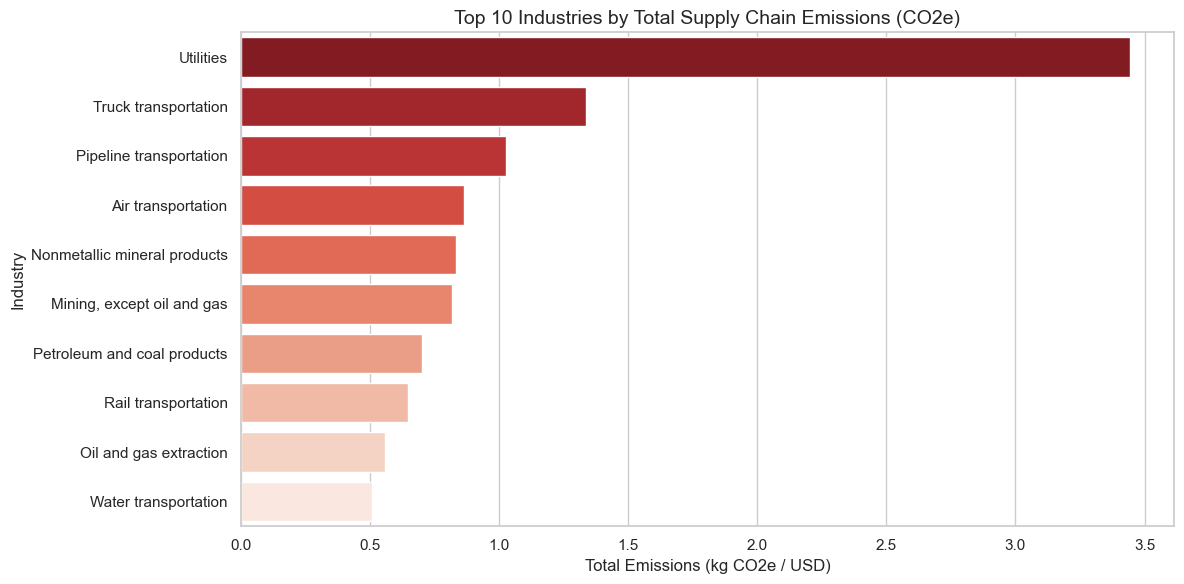

In [7]:
# 6.1: Top Emitting Industries (all substances combined)

industry_emissions = df.groupby("Industry Name")["Supply Chain Emission Factors with Margins"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=industry_emissions.values, y=industry_emissions.index, palette="Reds_r")
plt.title("Top 10 Industries by Total Supply Chain Emissions (CO2e)", fontsize=14)
plt.xlabel("Total Emissions (kg CO2e / USD)")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()

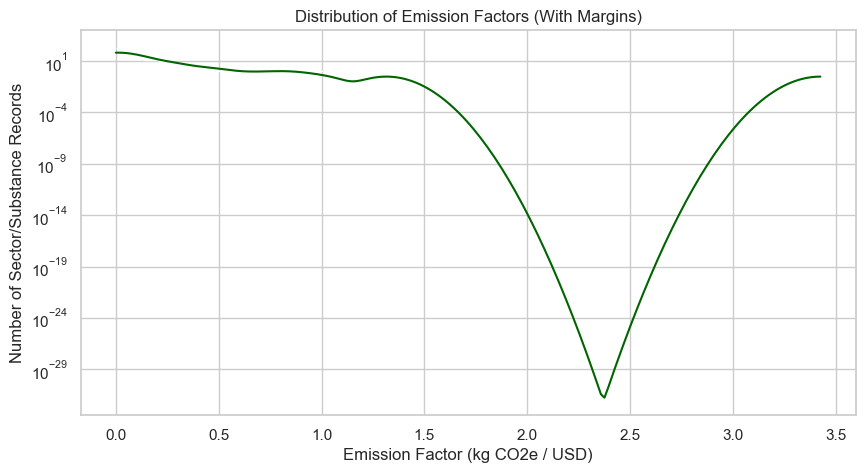

In [8]:
# 6.2: Distribution of Emission Factors (log-scaled to reduce skewness)

plt.figure(figsize=(10,5))
sns.histplot(df["Supply Chain Emission Factors with Margins"], bins=50, kde=True, color="darkgreen", log_scale=(False, True))
plt.title("Distribution of Emission Factors (With Margins)")
plt.xlabel("Emission Factor (kg CO2e / USD)")
plt.ylabel("Number of Sector/Substance Records")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_42248\2709984827.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=substance_emissions.values, y=substance_emissions.index, palette="coolwarm")


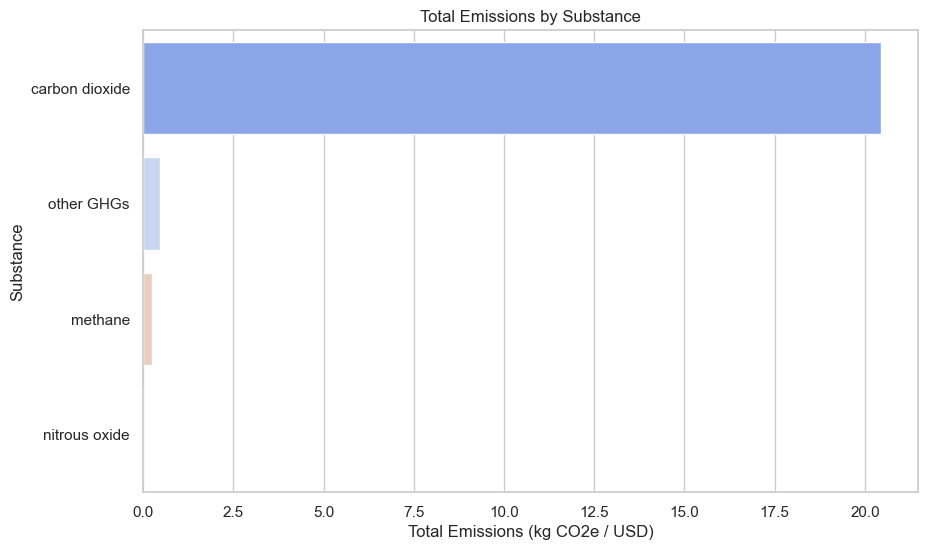

In [10]:
# 6.4: Emissions by Substance (CO2, CH4, N2O, etc.)

substance_emissions = df.groupby("Substance")["Supply Chain Emission Factors with Margins"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=substance_emissions.values, y=substance_emissions.index, palette="coolwarm")
plt.title("Total Emissions by Substance")
plt.xlabel("Total Emissions (kg CO2e / USD)")
plt.ylabel("Substance")
plt.show()

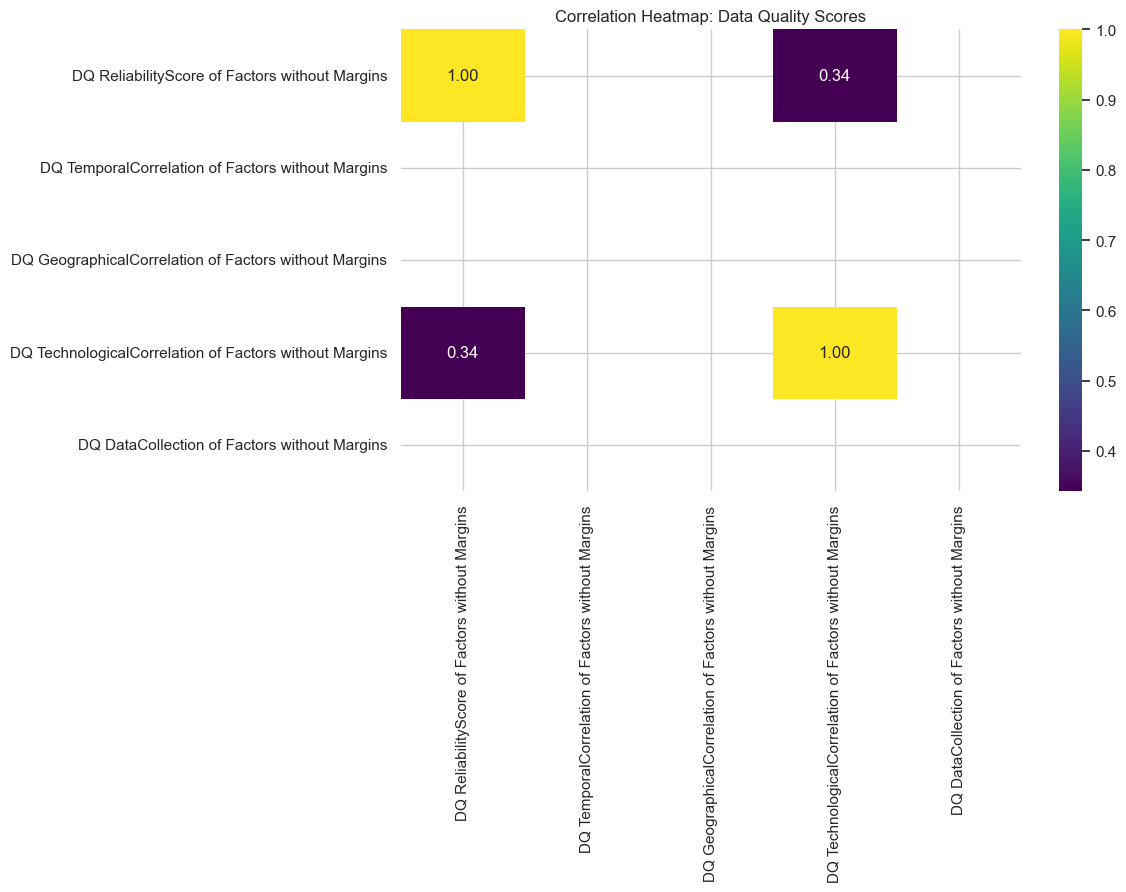

In [11]:
# 6.5: Correlation Heatmap of Data Quality Dimensions

dq_cols = [col for col in df.columns if "DQ" in col]
plt.figure(figsize=(10,6))
sns.heatmap(df[dq_cols].corr(), annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Heatmap: Data Quality Scores")
plt.show()